In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## Descente gradient simple

### Binary Cross Entropy Loss

In [4]:
def makeBCE(target):
    def BCE(p):
        return -(target*np.log(p) + (1. - target)*np.log(1-p))
    return BCE        

In [5]:
BCE_0 = makeBCE(0.)
BCE_1 = makeBCE(1.)

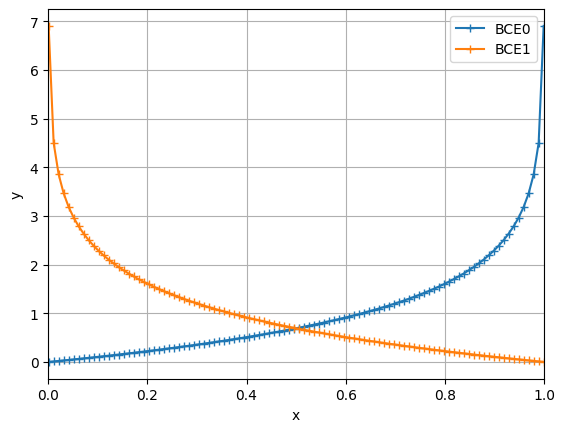

In [6]:
x = np.linspace(0.001, 0.999, 100)

y0 = BCE_0(x)
y1 = BCE_1(x)

def _():
    plt.plot(x, y0, "+-", label="BCE0")
    plt.plot(x, y1, "+-", label="BCE1")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(left=0., right=1.)
    # plt.ylim(0., 1.)
    plt.grid(True)
    plt.legend()
_()

### With sigmoid

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

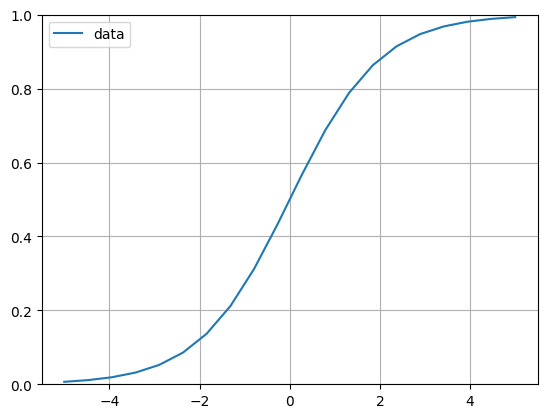

In [8]:
x= np.linspace(-5., 5., 20)

y = sigmoid(x)

plt.plot(x, y, label="data")
plt.ylim(0,1)
plt.grid(True)
plt.legend()

In [9]:
def sigmoid_p(x):
    return sigmoid(x)*(1-sigmoid(x))

In [10]:
def BCE(p, target):
    return -(target*np.log(p) + (1. - target)*np.log(1-p))

In [11]:
def BCE_p(p, target):
    return -(target / p + (target - 1) / (1 - p))

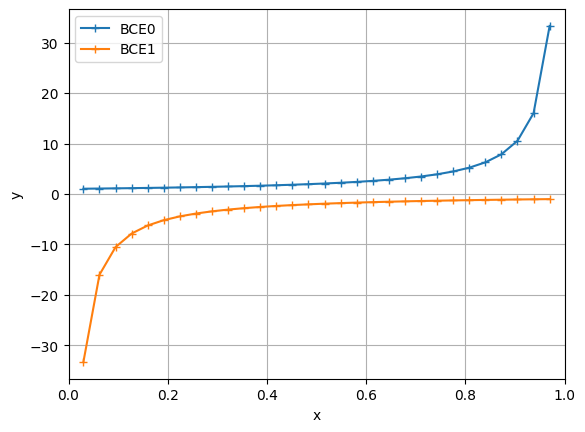

In [12]:
x = np.linspace(0.03, 0.97, 30)

y0 = BCE_p(x, 0.)
y1 = BCE_p(x, 1.)

def _():
    plt.plot(x, y0, "+-", label="BCE0")
    plt.plot(x, y1, "+-", label="BCE1")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(left=0., right=1.)
    # plt.ylim(0., 1.)
    plt.grid(True)
    plt.legend()
_()

Affichage du `loss` en fonction de `x`

In [13]:
def loss(x, target):
    p = sigmoid(x)
    loss = BCE(p, target)
    return loss

In [14]:
def show_loss_for_target_one(x):
    plt.plot(x, loss(x, np.ones_like(x)), label="loss")
    plt.ylim(0, 10)
    plt.grid(True)
    plt.legend()

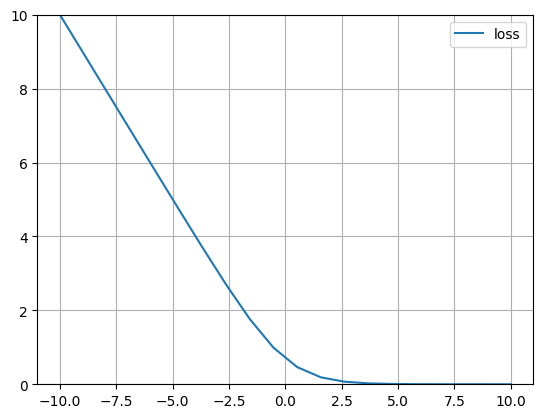

In [15]:
x = np.linspace(-10, 10, 20)

show_loss_for_target_one(x)

Calcul du **gradient**

In [16]:
def d_loss_d_x(x, target):
    p = sigmoid(x)
    return BCE_p(p, target)*sigmoid_p(x)

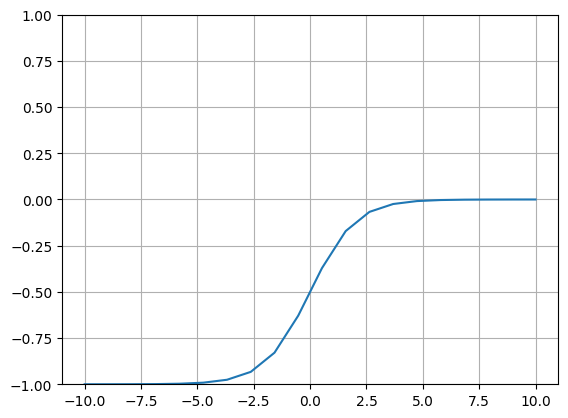

In [17]:
x = np.linspace(-10, 10, 20)
target = np.ones_like(x)

def _():
    plt.plot(x, d_loss_d_x(x, target))
    plt.ylim(-1, 1)
    plt.grid(True)
_()

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
[-0.55274181  0.04372337  0.5021248   0.85892549  1.1443047   1.37938128
  1.57884091  1.75417468  1.91743663  2.08745918  2.30140613  2.62809825
  3.1527053   3.90408286  4.82023434  5.81952611  6.85271653  7.8984556
  8.94866821 10.00045388]


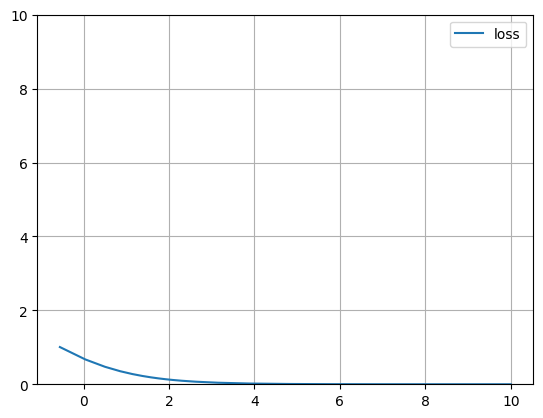

In [18]:
x = np.linspace(-10, 10, 20)
print(x)
def adjust(x, target, lr=1e-1):
    dloss = d_loss_d_x(x, target)
    x += -lr*dloss
    return x
for i in range(100):
    x = adjust(x, target)
print(x)

show_loss_for_target_one(x)